In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [2]:
img = np.load('./data/images.npy')
lbl = np.load('./data/labels.npy')
print(f"{img.shape=}  {lbl.shape=}")

img.shape=(18000, 150, 150)  lbl.shape=(18000, 2)


In [3]:
img = img.astype(float) / 255
img = np.expand_dims(img, -1)
print(f"{img.shape=}  {lbl.shape=}")

img.shape=(18000, 150, 150, 1)  lbl.shape=(18000, 2)


In [4]:
lbl[89]

array([0, 3], dtype=int64)

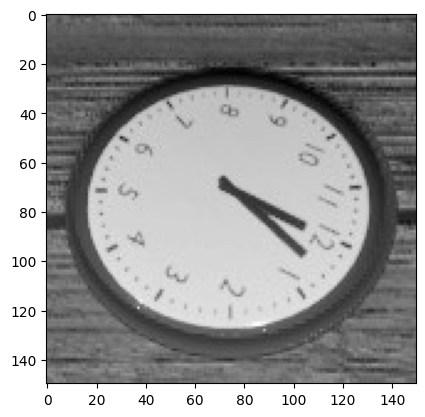

In [5]:
plt.figure()
plt.imshow(img[89])
plt.gray()
plt.show()

In [6]:
def convert_to_mins(lbl):
    mins = [lbl[i][0]*60 + lbl[i][1] for i in range(len(lbl))] 
    return np.array(mins)

lbl = convert_to_mins(lbl)  

In [7]:
x_train, x_test, y_train, y_test = train_test_split(img, lbl, train_size=0.8, random_state=42)

In [8]:
X_valid, X_train = x_train[:2400], x_train[2400:] 
y_valid, y_train = y_train[:2400], y_train[2400:]
print(f"{X_train.shape=}  {y_train.shape=}")

X_train.shape=(12000, 150, 150, 1)  y_train.shape=(12000,)


In [9]:
from functools import partial
# Specify Models
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3,
                        activation='relu',
                        padding="SAME")

model = keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, strides=3,input_shape=[150,150,1]),
    DefaultConv2D(filters=64, kernel_size=7, strides=3),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128, kernel_size=5),
    DefaultConv2D(filters=128, kernel_size=5),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=512),
    keras.layers.Flatten(),
    keras.layers.Dense(units=300, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(units=100, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(units=1, activation="linear"),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        3200      
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        200768    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         4

In [ ]:
# Custom Loss Function
def custom_mae(y_true, y_pred):
    y_pred = tf.math.floormod(y_pred, 720)
    abs_diff = tf.math.abs(y_true - y_pred)
    min_diff = tf.minimum(720 - abs_diff, abs_diff)
    return tf.reduce_mean(min_diff)

In [1]:
# # compile models
model.compile(loss= "mae",
            optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=1e-4),
            metrics=["accuracy"]
            )

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2665470619.py, line 3)

In [13]:
y_train = y_train.astype(float)
y_test = y_test.astype(float) 

In [14]:
model.fit(X_train, y_train, epochs=10,
            validation_data = (X_valid, y_valid),
            batch_size = 32
        )

Epoch 1/10
375/375 [==============================] - 59s 154ms/step - loss: 186.5002 - val_loss: 303.1352
Epoch 2/10
375/375 [==============================] - 55s 148ms/step - loss: 171.1295 - val_loss: 665.8637
Epoch 3/10
375/375 [==============================] - 56s 150ms/step - loss: 152.0012 - val_loss: 159.4821
Epoch 4/10
375/375 [==============================] - 56s 151ms/step - loss: 139.5596 - val_loss: 161.6029
Epoch 5/10
375/375 [==============================] - 59s 158ms/step - loss: 127.5604 - val_loss: 131.0148
Epoch 6/10
375/375 [==============================] - 57s 151ms/step - loss: 117.0856 - val_loss: 112.9628
Epoch 7/10
375/375 [==============================] - 56s 150ms/step - loss: 108.8027 - val_loss: 222.0690
Epoch 8/10
375/375 [==============================] - 57s 151ms/step - loss: 97.7004 - val_loss: 131.4978
Epoch 9/10
375/375 [==============================] - 58s 154ms/step - loss: 86.9151 - val_loss: 90.4495
Epoch 10/10
375/375 [===================

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [17]:
print(score)

79.16700744628906


In [18]:
x_test[0].shape

(150, 150, 1)

In [27]:
y_train[89]

312.0

In [26]:
model.predict(X_train[89].reshape(1, 150, 150, 1))

1/1 [==============================] - 0s 16ms/step


array([[354.89505]], dtype=float32)